<a href="https://colab.research.google.com/github/kirtikajain/House-Price-Prediction-Home.LLC/blob/main/US_Home_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [77]:
%cd /content/drive/MyDrive/Colab Notebooks/Features_Data

/content/drive/MyDrive/Colab Notebooks/Features_Data


# **House Price Prediction**
A Machine learning model using LightGBM, XGBoost, Gradient Boosting Regressor and comparing their performance on predicting HPI on real US Data Features.

*The dependent variable is:*

**CSUSHPISA:** S&P/Case-Shiller U.S. National Home Price Index

*The independent Variables includes :*



*   CPALTT01USM657N- Consumer Price Index: Total All Items for the United States
*   UNEMPLOY-Unemployment Level
*   PCE-Personal Consumption Expenditures, an index that measures monthly changes in the price of consumer goods and services as a means of analyzing inflation.
*   CPIHOSSL-Consumer Price Index for All Urban Consumers: Housing in U.S. City Average
*   H8B1001NCBCMG- Bank Credit, All Commercial Banks
*   MSACSR-The months' supply is the ratio of houses for sale to houses sold. 
*   POPTHM-Population includes resident population plus armed forces overseas.
*   LNU02300000- Employment-Population Ratio
*   MORTGAGE30US- Average interest rate, calculated weekly, of fixed-rate mortgages with a 30-year repayment term.
*   ETOTALUSQ176N-Housing Inventory Estimate: Total Housing Units in the United States
*   GDP-Gross Domestic Product
*   GDI-Gross Domestic Income
*   INTDSRUSM193N- Interest Rates, Discount Rate for United States
*   INDPRO-Industrial Production: Total Index( monthly index of real output for all facilities located in the U.S. in manufacturing, mining, and electric and gas industries.)
*  IPG321S-Industrial Production: Manufacturing: Durable Goods: Wood Product
*   IPG333S-Industrial Production: Manufacturing: Durable Goods: Machinery
*   IPB54100S-Industrial Production: Construction Supplies
*   IPB53122S-Industrial Production: Durable Goods Materials: Semiconductors, Printed Circuit Boards, and Other















A) Importing all necessary modules.

In [2]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_log_error
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error
import xgboost as xgb
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

B) Data Cleaning


> 1. Keeping Data from 2000-2020

> 2. Converting the quarterly and daily data to monthly intervals.

> 3. Joining Single features into one single dataframe.







In [79]:
HPI=pd.read_csv("CSUSHPISA.csv")
HPI['DATE'] = pd.to_datetime(HPI['DATE'])
HPI['Date'] = HPI['DATE'].dt.strftime('%m-%Y')
HPI=HPI[(HPI["DATE"]>"12-1999") & (HPI["DATE"]<"01-2021")]
HPI=HPI.drop(['DATE'], axis = 1)
HPI=HPI.reset_index()
HPI=HPI.drop(['index'],axis=1)
#print(HPI.head(10))

total_cpi=pd.read_csv("CPALTT01USM657N.csv")
total_cpi['DATE'] = pd.to_datetime(total_cpi['DATE'])
total_cpi['Date'] = total_cpi['DATE'].dt.strftime('%m-%Y')
total_cpi=total_cpi[(total_cpi["DATE"]>"12-1999") & (total_cpi["DATE"]<"01-2021")]
total_cpi=total_cpi.drop(['DATE'], axis = 1)
total_cpi=total_cpi.reset_index()
total_cpi=total_cpi.drop(['index'], axis=1)
#print(total_cpi.head(10))

unemploy=pd.read_csv("UNEMPLOY.csv")
unemploy['DATE'] = pd.to_datetime(unemploy['DATE'])
unemploy['Date'] = unemploy['DATE'].dt.strftime('%m-%Y')
unemploy=unemploy[(unemploy["DATE"]>"12-1999") & (unemploy["DATE"]<"01-2021")]
unemploy=unemploy.drop(['DATE'], axis = 1)
unemploy=unemploy.reset_index()
unemploy=unemploy.drop(['index'],axis=1)
#print(unemploy.head(10))


pce=pd.read_csv("PCE.csv")
pce['DATE'] = pd.to_datetime(pce['DATE'])
pce['Date'] = pce['DATE'].dt.strftime('%m-%Y')
pce=pce[(pce["DATE"]>"12-1999") & (pce["DATE"]<"01-2021")]
pce=pce.drop(['DATE'], axis = 1)
pce=pce.reset_index()
pce=pce.drop(['index'],axis=1)
#print(pce.head(10))

hcpi=pd.read_csv("CPIHOSSL.csv")
hcpi['DATE'] = pd.to_datetime(hcpi['DATE'])
hcpi['Date'] = hcpi['DATE'].dt.strftime('%m-%Y')
hcpi=hcpi[(hcpi["DATE"]>"12-1999") & (hcpi["DATE"]<"01-2021")]
hcpi=hcpi.drop(['DATE'], axis = 1)
hcpi=hcpi.reset_index()
hcpi=hcpi.drop(['index'],axis=1)
#print(hcpi.head(10))

bank_creds=pd.read_csv("H8B1001NCBCMG.csv")
bank_creds['DATE'] = pd.to_datetime(bank_creds['DATE'])
bank_creds['Date'] = bank_creds['DATE'].dt.strftime('%m-%Y')
bank_creds=bank_creds[(bank_creds["DATE"]>"12-1999") & (bank_creds["DATE"]<"01-2021")]
bank_creds=bank_creds.drop(['DATE'], axis = 1)
bank_creds=bank_creds.reset_index()
bank_creds=bank_creds.drop(['index'],axis=1)
#print(bank_creds.head(10))

month_supply=pd.read_csv("MSACSR.csv")
month_supply['DATE'] = pd.to_datetime(month_supply['DATE'])
month_supply['Date'] = month_supply['DATE'].dt.strftime('%m-%Y')
month_supply=month_supply[(month_supply["DATE"]>"12-1999") & (month_supply["DATE"]<"01-2021")]
month_supply=month_supply.drop(['DATE'], axis = 1)
month_supply=month_supply.reset_index()
month_supply=month_supply.drop(['index'],axis=1)
#print(month_supply.head(10))

pop=pd.read_csv("POPTHM.csv")
pop['DATE'] = pd.to_datetime(pop['DATE'])
pop['Date'] = pop['DATE'].dt.strftime('%m-%Y')
pop=pop[(pop["DATE"]>"12-1999") & (pop["DATE"]<"01-2021")]
pop=pop.drop(['DATE'], axis = 1)
pop=pop.reset_index()
pop=pop.drop(['index'],axis=1)
#print(pop.head(10))

employ_pop=pd.read_csv("LNU02300000.csv")
employ_pop['DATE'] = pd.to_datetime(employ_pop['DATE'])
employ_pop['Date'] = employ_pop['DATE'].dt.strftime('%m-%Y')
employ_pop=employ_pop[(employ_pop["DATE"]>"12-1999") & (employ_pop["DATE"]<"01-2021")]
employ_pop=employ_pop.drop(['DATE'], axis = 1)
employ_pop=employ_pop.reset_index()
employ_pop=employ_pop.drop(['index'],axis=1)
#print(employ_pop.head(10))

interest_rate=pd.read_csv("INTDSRUSM193N.csv")
interest_rate['DATE'] = pd.to_datetime(interest_rate['DATE'])
interest_rate['Date'] = interest_rate['DATE'].dt.strftime('%m-%Y')
interest_rate=interest_rate[(interest_rate["DATE"]>"12-1999") & (interest_rate["DATE"]<"01-2021")]
interest_rate=interest_rate.drop(['DATE'], axis = 1)
interest_rate=interest_rate.reset_index()
interest_rate=interest_rate.drop(['index'],axis=1)
#print(interest_rate.head(10))

total_ip=pd.read_csv('INDPRO.csv')
total_ip['DATE'] = pd.to_datetime(total_ip['DATE'])
total_ip['Date'] = total_ip['DATE'].dt.strftime('%m-%Y')
total_ip=total_ip[(total_ip["DATE"]>"12-1999") & (total_ip["DATE"]<"01-2021")]
total_ip=total_ip.drop(['DATE'], axis = 1)
total_ip=total_ip.reset_index()
total_ip=total_ip.drop(['index'],axis=1)
#print(total_ip.head(10))

wood_ip=pd.read_csv('IPG321S.csv')
wood_ip['DATE'] = pd.to_datetime(wood_ip['DATE'])
wood_ip['Date'] = wood_ip['DATE'].dt.strftime('%m-%Y')
wood_ip=wood_ip[(wood_ip["DATE"]>"12-1999") & (wood_ip["DATE"]<"01-2021")]
wood_ip=wood_ip.drop(['DATE'], axis = 1)
wood_ip=wood_ip.reset_index()
wood_ip=wood_ip.drop(['index'],axis=1)
#print(wood_ip.head(10))

machinery_ip=pd.read_csv("IPG333S.csv")
machinery_ip['DATE'] = pd.to_datetime(machinery_ip['DATE'])
machinery_ip['Date'] = machinery_ip['DATE'].dt.strftime('%m-%Y')
machinery_ip=machinery_ip[(machinery_ip["DATE"]>"12-1999") & (machinery_ip["DATE"]<"01-2021")]
machinery_ip=machinery_ip.drop(['DATE'], axis = 1)
machinery_ip=machinery_ip.reset_index()
machinery_ip=machinery_ip.drop(['index'],axis=1)
#print(machinery_ip.head(10))

construction_ip=pd.read_csv("IPB54100S.csv")
construction_ip['DATE'] = pd.to_datetime(construction_ip['DATE'])
construction_ip['Date'] = construction_ip['DATE'].dt.strftime('%m-%Y')
construction_ip=construction_ip[(construction_ip["DATE"]>"12-1999") & (construction_ip["DATE"]<"01-2021")]
construction_ip=construction_ip.drop(['DATE'], axis = 1)
construction_ip=construction_ip.reset_index()
construction_ip=construction_ip.drop(['index'],axis=1)
#print(construction_ip.head(10))

electric_ip=pd.read_csv("IPB53122S.csv")
electric_ip['DATE'] = pd.to_datetime(electric_ip['DATE'])
electric_ip['Date'] = electric_ip['DATE'].dt.strftime('%m-%Y')
electric_ip=electric_ip[(electric_ip["DATE"]>"12-1999") & (electric_ip["DATE"]<"01-2021")]
electric_ip=electric_ip.drop(['DATE'], axis = 1)
electric_ip=electric_ip.reset_index()
electric_ip=electric_ip.drop(['index'],axis=1)
#print(electric_ip.head(10))


df3=pd.read_csv("MORTGAGE30US.csv")
df3['DATE'] = pd.to_datetime(df3['DATE'])
df3['Date'] = df3['DATE'].dt.strftime('%m-%Y')
df3=df3.drop(['DATE'], axis = 1)
df3['Date'] = pd.to_datetime(df3['Date'])
df3=df3.groupby( pd.Grouper(key='Date', freq="M")).mean()
dat1=df3['MORTGAGE30US']
dat1 = dat1.values.tolist()
dates1= pd.date_range(start='04-1971', periods=604, freq='M')
monthly1 = pd.Series(data=dat1, index=dates1)
monthly1=monthly1.to_frame('MORTGAGE30US')
monthly1.index.name="Date"
df3=monthly1.reset_index()
data_mort=df3[(df3["Date"]>"2000-01-01") & (df3["Date"]<"2021-01-01")]
mortgage=data_mort.reset_index()
mortgage=mortgage.drop(['index'],axis=1)
mortgage['Date'] = mortgage['Date'].dt.strftime('%m-%Y')
#print(mortgage.head(20))

df6=pd.read_csv("ETOTALUSQ176N.csv")
dat=df6['ETOTALUSQ176N']
dat = dat.values.tolist()
df6['DATE'] = pd.to_datetime(df6['DATE']).dt.strftime('%m-%d-%Y')
dates= pd.date_range(start='2000', periods=84, freq='Q')
quarterly = pd.Series(data=dat, index=dates)
inventory= quarterly.asfreq('M') 
dates = pd.date_range(start='2000', periods=252, freq='M')
inventory=inventory.reindex(dates) 
inventory= inventory.to_frame('baseline')
inventory['ETOTALUSQ176N'] = quarterly.asfreq('M', method='bfill') 
inventory.loc['2000-01-31'] = pd.Series({'ETOTALUSQ176N':116047.0})
inventory.loc['2000-02-29'] = pd.Series({'ETOTALUSQ176N':116047.0})
inventory=inventory.drop(['baseline'], axis = 1)
inventory['Date'] = inventory.index
inventory.reset_index(drop=True, inplace=True)
inventory['Date'] = inventory['Date'].dt.strftime('%m-%Y')
#print(inventory.head(10))

df=pd.read_csv("GDP.csv")
gdp_l=df['GDP']
gdp_l= gdp_l.values.tolist()
df['DATE'] = pd.to_datetime(df['DATE']).dt.strftime('%m-%d-%Y')
dates1= pd.date_range(start='1947', periods=297, freq='Q')
quarterly1 = pd.Series(data=gdp_l, index=dates1)
gdp= quarterly1.asfreq('M') 
dates1= pd.date_range(start='2000', periods=252, freq='M')
gdp=gdp.reindex(dates1) 
gdp=gdp.to_frame('baseline')
gdp['GDP'] = quarterly1.asfreq('M', method='bfill') 
gdp.loc['2000-01-31'] = pd.Series({'GDP':10002.857})
gdp.loc['2000-02-29'] = pd.Series({'GDP':10002.857})
gdp=gdp.drop(['baseline'], axis = 1)
gdp['Date'] = gdp.index
gdp.reset_index(drop=True, inplace=True)
gdp['Date'] = gdp['Date'].dt.strftime('%m-%Y')
#print(gdp.head(10))

df1=pd.read_csv("GDI.csv")
gdi_l=df1['GDI']
gdi_l= gdi_l.values.tolist()
df1['DATE'] = pd.to_datetime(df1['DATE']).dt.strftime('%m-%d-%Y')
dates2= pd.date_range(start='1947', periods=297, freq='Q')
quarterly2 = pd.Series(data=gdi_l, index=dates2)
gdi= quarterly2.asfreq('M') 
dates2= pd.date_range(start='2000', periods=252, freq='M')
gdi=gdi.reindex(dates2) 
gdi=gdi.to_frame('baseline')
gdi['GDI'] = quarterly2.asfreq('M', method='bfill') 
gdi.loc['2000-01-31'] = pd.Series({'GDI':10179.913})
gdi.loc['2000-02-29'] = pd.Series({'GDI':10179.913})
gdi=gdi.drop(['baseline'], axis = 1)
gdi['Date'] = gdi.index
gdi.reset_index(drop=True, inplace=True)
gdi['Date'] = gdi['Date'].dt.strftime('%m-%Y')
#print(gdi.head(10))

f_join=pd.merge(total_cpi, unemploy,  how="outer", on=[ "Date"])
f_join1 = pd.merge(gdp, mortgage,  how="outer", on=["Date"])
f_join_1 = pd.merge(f_join, f_join1,  how="outer", on=["Date"])
f_join2 = pd.merge(pce, hcpi,  how="outer", on=["Date"])
f_join3 = pd.merge(pop, employ_pop,  how="outer", on=["Date"])
f_join_2 = pd.merge(f_join2, f_join3,  how="outer", on=["Date"])
f_join4 = pd.merge(gdi, interest_rate,  how="outer", on=["Date"])
f_join5 = pd.merge(bank_creds, inventory,  how="outer", on=["Date"])
f_join_3 = pd.merge(f_join4, f_join5,  how="outer", on=["Date"])
f_join6 = pd.merge(month_supply, total_ip,  how="outer", on=["Date"])
f_join7 = pd.merge(construction_ip, machinery_ip,  how="outer", on=["Date"])
f_join_4 = pd.merge(f_join6, f_join7,  how="outer", on=["Date"])
f_join_5 = pd.merge(f_join_1, f_join_2,  how="outer", on=["Date"])
f_join_6 = pd.merge(f_join_4, f_join_3,  how="outer", on=["Date"])
f_join_7 = pd.merge(f_join_5, f_join_6,  how="outer", on=["Date"])
f_join8 = pd.merge(electric_ip, wood_ip,  how="outer", on=["Date"])
f_join_8 = pd.merge(f_join_7, f_join8,  how="outer", on=["Date"])
dataset = pd.merge(f_join_8, HPI,  how="outer", on=["Date"])
print(dataset.head(3))
print(dataset.info())


   CPALTT01USM657N     Date  UNEMPLOY  ...  IPB53122S   IPG321S  CSUSHPISA
0         0.297089  01-2000      5708  ...     3.8603  121.6639    100.552
1         0.592417  02-2000      5858  ...     3.9945  121.2380    101.339
2         0.824499  03-2000      5733  ...     4.1880  121.6561    102.127

[3 rows x 20 columns]
<class 'pandas.core.frame.DataFrame'>
Int64Index: 252 entries, 0 to 251
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CPALTT01USM657N  252 non-null    float64
 1   Date             252 non-null    object 
 2   UNEMPLOY         252 non-null    int64  
 3   GDP              252 non-null    float64
 4   MORTGAGE30US     252 non-null    float64
 5   PCE              252 non-null    float64
 6   CPIHOSSL         252 non-null    float64
 7   POPTHM           252 non-null    float64
 8   LNU02300000      252 non-null    float64
 9   MSACSR           252 non-null    float64
 10  INDPRO         

C) Splitting Dataset into Training and Test Sets.

In [4]:
from sklearn.model_selection import train_test_split

train_data, test_data=train_test_split(dataset, test_size=0.2)
print(train_data.info())
actual_price_test=test_data.CSUSHPISA.values
print(actual_price_test)
test_data=test_data.drop(["CSUSHPISA"], axis=1)
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 49 to 53
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CPALTT01USM657N  201 non-null    float64
 1   Date             201 non-null    object 
 2   UNEMPLOY         201 non-null    int64  
 3   GDP              201 non-null    float64
 4   MORTGAGE30US     201 non-null    float64
 5   PCE              201 non-null    float64
 6   CPIHOSSL         201 non-null    float64
 7   POPTHM           201 non-null    float64
 8   LNU02300000      201 non-null    float64
 9   MSACSR           201 non-null    float64
 10  INDPRO           201 non-null    float64
 11  IPB54100S        201 non-null    float64
 12  IPG333S          201 non-null    float64
 13  GDI              201 non-null    float64
 14  INTDSRUSM193N    201 non-null    float64
 15  H8B1001NCBCMG    201 non-null    float64
 16  ETOTALUSQ176N    201 non-null    float64
 17  IPB53122S       

In [5]:
trainshape = ("Train Data:",train_data.shape[0],"obs, and", train_data.shape[1], "features" )
print("\033[95m {}\033[00m" .format(trainshape))
testshape = ("Test Data:",test_data.shape[0],"obs, and", test_data.shape[1], "features" )
print("\033[95m {}\033[00m" .format(testshape))

 ('Train Data:', 201, 'obs, and', 20, 'features')
 ('Test Data:', 51, 'obs, and', 19, 'features')


In [6]:
#save id 
train_id = train_data["Date"]
test_id = test_data["Date"]

#drop id
train_data.drop("Date" , axis = 1 , inplace = True)
test_data.drop("Date" , axis = 1 , inplace = True)
print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 49 to 53
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CPALTT01USM657N  201 non-null    float64
 1   UNEMPLOY         201 non-null    int64  
 2   GDP              201 non-null    float64
 3   MORTGAGE30US     201 non-null    float64
 4   PCE              201 non-null    float64
 5   CPIHOSSL         201 non-null    float64
 6   POPTHM           201 non-null    float64
 7   LNU02300000      201 non-null    float64
 8   MSACSR           201 non-null    float64
 9   INDPRO           201 non-null    float64
 10  IPB54100S        201 non-null    float64
 11  IPG333S          201 non-null    float64
 12  GDI              201 non-null    float64
 13  INTDSRUSM193N    201 non-null    float64
 14  H8B1001NCBCMG    201 non-null    float64
 15  ETOTALUSQ176N    201 non-null    float64
 16  IPB53122S        201 non-null    float64
 17  IPG321S         

D) Exploratory Data Analysis
 

In [7]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CPALTT01USM657N,201.0,0.179367,0.350704,-1.034247,-0.053624,0.176676,0.440019,1.0077
UNEMPLOY,201.0,9272.407960,2957.944305,5481.000000,7091.000000,8251.000000,11335.000000,17697.0000
GDP,201.0,15507.351577,3359.803881,10002.857000,12910.022000,14926.098000,18223.577000,21747.3940
MORTGAGE30US,201.0,5.082522,1.292523,2.765000,3.967500,4.857500,6.095000,8.5150
PCE,201.0,10488.311443,2320.559070,6535.300000,8643.900000,10112.900000,12264.500000,14880.5000
CPIHOSSL,201.0,218.277080,28.259895,166.500000,194.300000,217.304000,237.210000,273.8980
POPTHM,201.0,308171.099502,14473.826540,281083.000000,295359.000000,309279.000000,320574.000000,330829.0000
LNU02300000,201.0,60.719900,2.065140,54.900000,58.900000,60.400000,62.600000,64.8000
MSACSR,201.0,5.832836,1.996175,3.500000,4.300000,5.300000,6.700000,12.2000
INDPRO,201.0,96.421544,4.904928,84.784100,92.401900,97.353000,100.791800,104.1659


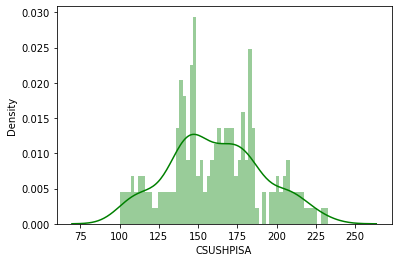

In [8]:
sns.distplot(train_data["CSUSHPISA"] , color = "g", bins = 60 , hist_kws={"alpha": 0.4});

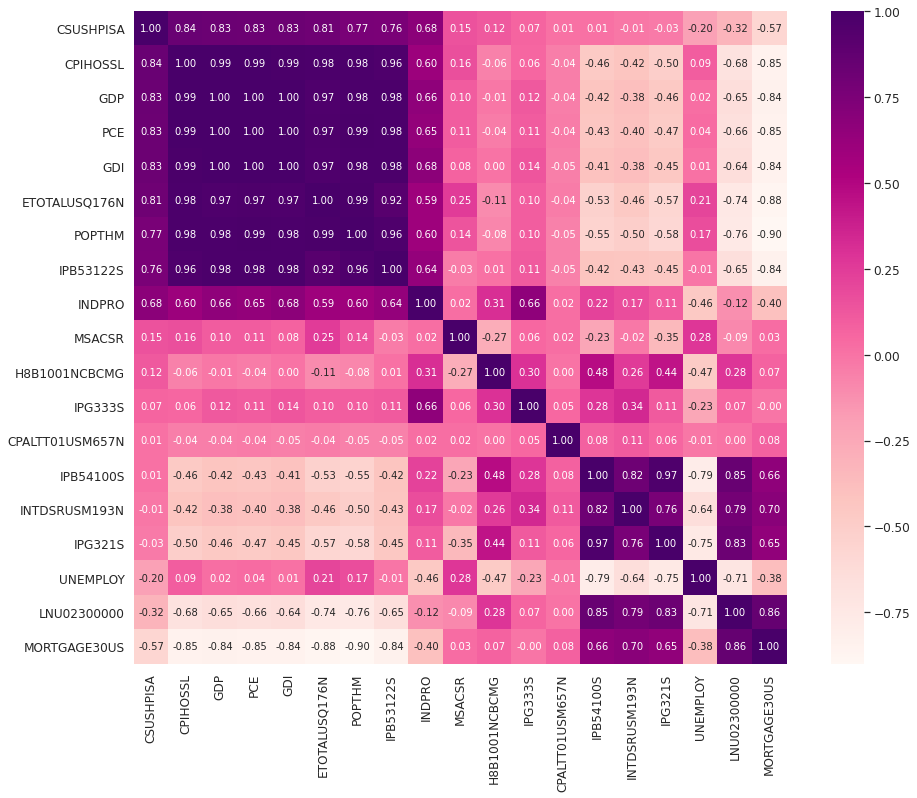

In [9]:
corrmatrix = train_data.corr()
plt.figure(figsize = (16,12))
columnss = corrmatrix.nlargest(21, "CSUSHPISA")["CSUSHPISA"].index
cm = np.corrcoef(train_data[columnss].values.T)
sns.set(font_scale = 1.1)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, cmap = "RdPu" ,  fmt = ".2f", annot_kws = {"size": 10},
                 yticklabels = columnss.values, xticklabels = columnss.values)
plt.show()

To reduce multicollinearity, dropping two columns having high correlation coefficient.

In [10]:
 train_data=train_data.drop(columns=['IPB53122S','IPG321S'], axis=1)
 test_data=test_data.drop(columns=['IPB53122S','IPG321S'], axis=1)
print(train_data.info())
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 49 to 53
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CPALTT01USM657N  201 non-null    float64
 1   UNEMPLOY         201 non-null    int64  
 2   GDP              201 non-null    float64
 3   MORTGAGE30US     201 non-null    float64
 4   PCE              201 non-null    float64
 5   CPIHOSSL         201 non-null    float64
 6   POPTHM           201 non-null    float64
 7   LNU02300000      201 non-null    float64
 8   MSACSR           201 non-null    float64
 9   INDPRO           201 non-null    float64
 10  IPB54100S        201 non-null    float64
 11  IPG333S          201 non-null    float64
 12  GDI              201 non-null    float64
 13  INTDSRUSM193N    201 non-null    float64
 14  H8B1001NCBCMG    201 non-null    float64
 15  ETOTALUSQ176N    201 non-null    float64
 16  CSUSHPISA        201 non-null    float64
dtypes: float64(16), 

Displaying the 8 high weighted features affecting HPI.

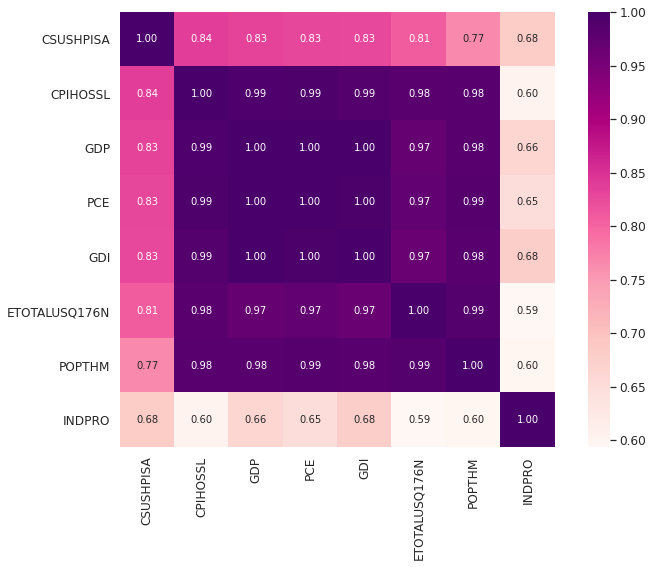

In [12]:
corrmatrix = train_data.corr()
plt.figure(figsize = (12,8))
columnss = corrmatrix.nlargest(8, "CSUSHPISA")["CSUSHPISA"].index
cm = np.corrcoef(train_data[columnss].values.T)
sns.set(font_scale = 1.1)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, cmap = "RdPu" ,  fmt = ".2f", annot_kws = {"size": 10},
                 yticklabels = columnss.values, xticklabels = columnss.values)
plt.show()


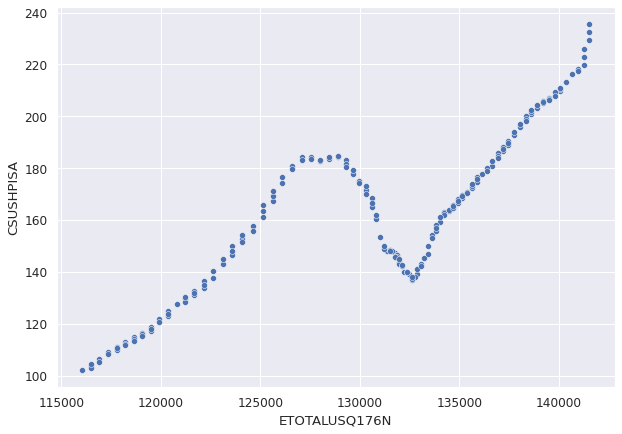

In [11]:
 f, ax = plt.subplots(figsize = (10, 7))
sns.scatterplot(x = train_data['ETOTALUSQ176N'], y = train_data["CSUSHPISA"]);

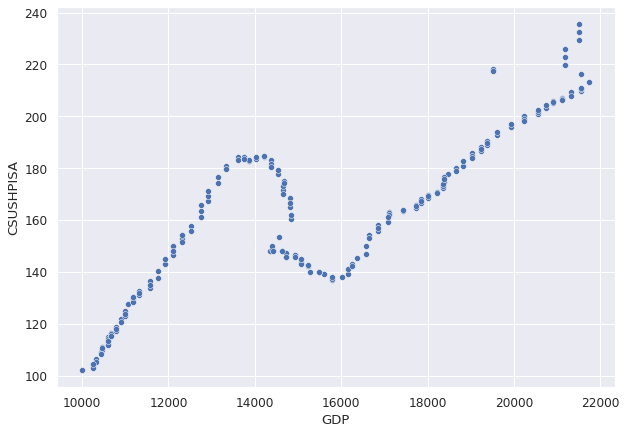

In [12]:
f, ax = plt.subplots(figsize = (10, 7))
sns.scatterplot(x = train_data['GDP'], y = train_data["CSUSHPISA"]);

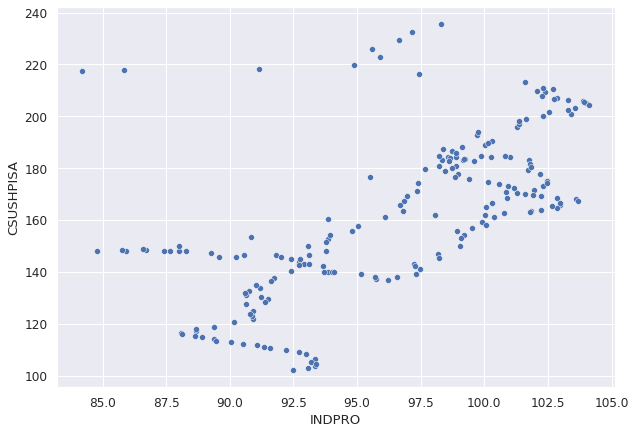

In [13]:
f, ax = plt.subplots(figsize = (10, 7))
sns.scatterplot(x = train_data['INDPRO'], y = train_data["CSUSHPISA"]);

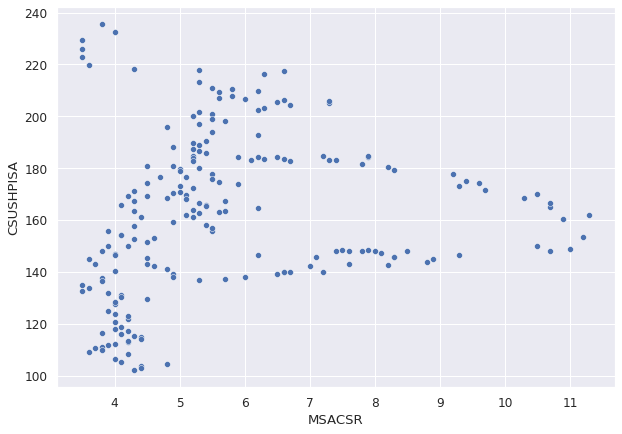

In [14]:
f, ax = plt.subplots(figsize = (10, 7))
sns.scatterplot(x = train_data['MSACSR'], y = train_data["CSUSHPISA"]);

In [13]:
actual_price_train = train_data['CSUSHPISA']
print(actual_price_train[:5])
train_data=train_data.drop(['CSUSHPISA'], axis=1)
print(train_data.info())


49     143.193
102    163.570
88     181.602
57     155.750
39     130.884
Name: CSUSHPISA, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 201 entries, 49 to 53
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CPALTT01USM657N  201 non-null    float64
 1   UNEMPLOY         201 non-null    int64  
 2   GDP              201 non-null    float64
 3   MORTGAGE30US     201 non-null    float64
 4   PCE              201 non-null    float64
 5   CPIHOSSL         201 non-null    float64
 6   POPTHM           201 non-null    float64
 7   LNU02300000      201 non-null    float64
 8   MSACSR           201 non-null    float64
 9   INDPRO           201 non-null    float64
 10  IPB54100S        201 non-null    float64
 11  IPG333S          201 non-null    float64
 12  GDI              201 non-null    float64
 13  INTDSRUSM193N    201 non-null    float64
 14  H8B1001NCBCMG    201 non-null    float64
 15  E

In [14]:
X_train, X_test, y_train, y_test = train_test_split(train_data, actual_price_train, test_size=0.2, random_state=42)
print(X_train.head(3))
print(X_test.head(3))
print(y_train.head(3))
print(y_test.head(3))

     CPALTT01USM657N  UNEMPLOY  ...  H8B1001NCBCMG  ETOTALUSQ176N
131         0.171844     14348  ...           -4.4       132110.0
58          0.052383      7932  ...           10.4       124611.0
190        -0.211068      8000  ...            6.7       135868.0

[3 rows x 16 columns]
     CPALTT01USM657N  UNEMPLOY  ...  H8B1001NCBCMG  ETOTALUSQ176N
175        -0.167051      9599  ...            5.8       134687.0
72          0.762195      7064  ...            7.9       127072.0
8           0.520833      5625  ...            5.2       116914.0

[3 rows x 16 columns]
131    142.064
58     157.527
190    175.762
Name: CSUSHPISA, dtype: float64
175    165.225
72     182.321
8      106.537
Name: CSUSHPISA, dtype: float64


PCA-Principal Component Analysis 


> To reduce dimesnionality of the data.


True


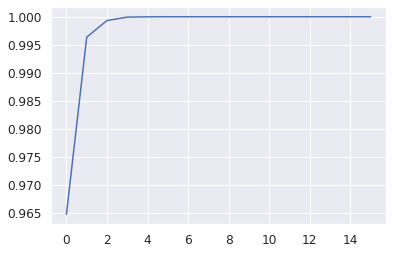

In [17]:
from sklearn.decomposition import PCA
pca = PCA()
print(np.all(np.isfinite(train_data)))
pca_fit = pca.fit_transform(train_data)
pca = PCA().fit(train_data)
plt.plot(np.cumsum(pca.explained_variance_ratio_));

In [19]:
pca = PCA(n_components = 13)
pca_fit = pca.fit_transform(train_data)
pca_df = pd.DataFrame(data = pca_fit)
print(pca_df.head())

             0            1            2   ...        10        11        12
0  18510.272574  -544.037222    45.565196  ... -0.829882  0.773958 -0.364159
1   3308.295354   -17.485559  1755.569659  ...  0.865287  1.919937  0.048828
2   7056.629588 -2150.382516  2000.904515  ...  0.411037 -0.560225 -0.979361
3  16001.938497  -710.494751   637.067661  ... -1.472035  0.632150  0.260112
4  21236.042082   159.711267  -382.085667  ... -0.085144  0.636448 -0.530723

[5 rows x 13 columns]


***1) LightGBM***


In [21]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'rf',
    'objective': 'regression',
    'metric': ['rmse', 'l1'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 4,
    "num_leaves": 31,  
    "max_bin": 255,
    "num_iterations": 10000,
    "n_estimators": 3000
}

In [22]:
light_gbm = lgb.LGBMRegressor(**hyper_params)

In [23]:
light_gbm.fit( X_train, y_train,
        eval_set=[(X_test, y_test)],
        eval_metric='rmse',
        early_stopping_rounds=1000)

[1]	valid_0's l1: 10.2939	valid_0's rmse: 12.388
Training until validation scores don't improve for 1000 rounds.
[2]	valid_0's l1: 9.57655	valid_0's rmse: 11.6173
[3]	valid_0's l1: 9.46036	valid_0's rmse: 11.4859
[4]	valid_0's l1: 9.57655	valid_0's rmse: 11.6173
[5]	valid_0's l1: 9.35155	valid_0's rmse: 11.3351
[6]	valid_0's l1: 9.32003	valid_0's rmse: 11.3101
[7]	valid_0's l1: 9.31761	valid_0's rmse: 11.3021
[8]	valid_0's l1: 9.31579	valid_0's rmse: 11.3015
[9]	valid_0's l1: 9.31437	valid_0's rmse: 11.3042
[10]	valid_0's l1: 9.22904	valid_0's rmse: 11.2013
[11]	valid_0's l1: 9.23204	valid_0's rmse: 11.2496
[12]	valid_0's l1: 9.23454	valid_0's rmse: 11.2986
[13]	valid_0's l1: 9.23666	valid_0's rmse: 11.3463
[14]	valid_0's l1: 9.20717	valid_0's rmse: 11.3248
[15]	valid_0's l1: 9.21083	valid_0's rmse: 11.3691
[16]	valid_0's l1: 9.18663	valid_0's rmse: 11.3555
[17]	valid_0's l1: 9.16529	valid_0's rmse: 11.3482
[18]	valid_0's l1: 9.17066	valid_0's rmse: 11.3859
[19]	valid_0's l1: 9.17547	v

LGBMRegressor(bagging_fraction=0.7, bagging_freq=10, boosting_type='rf',
              class_weight=None, colsample_bytree=1.0, feature_fraction=0.9,
              importance_type='split', learning_rate=0.005, max_bin=255,
              max_depth=4, metric=['rmse', 'l1'], min_child_samples=20,
              min_child_weight=0.001, min_split_gain=0.0, n_estimators=3000,
              n_jobs=-1, num_iterations=10000, num_leaves=31,
              objective='regression', random_state=None, reg_alpha=0.0,
              reg_lambda=0.0, silent=True, subsample=1.0,
              subsample_for_bin=200000, subsample_freq=0, task='train',
              verbose=0)

In [44]:
  light_gbm_pred = light_gbm.predict(X_train, num_iteration=light_gbm.best_iteration_)

In [46]:
print(light_gbm_pred[:5])
print(y_train[:5])

[146.28611565 157.13515669 173.1938264  201.46039823 201.46039823]
131    142.064
58     157.527
190    175.762
219    200.870
250    232.629
Name: CSUSHPISA, dtype: float64


In [47]:
light_gbm_test_pred = light_gbm.predict(test_data, num_iteration=light_gbm.best_iteration_)

In [48]:
print(light_gbm_test_pred[:5])
print(actual_price_test[:5])

[146.28611565 172.41620822 162.57614862 174.79876126 124.26171576]
[140.358 176.627 174.442 173.858 104.424]


Evaluating LightGBM using two metrics:


1.   Root Mean Square Error
2.   Root Mean Square Log Error



In [52]:
print('The RMSE of prediction is:', round(mean_squared_error(light_gbm_pred, y_train) ** 0.5, 5))
print('The RMSLE of prediction is:', round(mean_squared_log_error(light_gbm_pred, y_train) ** 0.5, 5))    

The RMSE of prediction is: 9.8258
The RMSLE of prediction is: 0.06017


Cross validation with k folds

In [53]:
n_folds = 5

def rmsle_cv(model):
    kf = KFold(n_folds, shuffle = True, random_state = 42).get_n_splits(train_data.values)
    rmse = np.sqrt(-cross_val_score(model, train_data.values, actual_price_train, scoring = "neg_mean_squared_error", cv = kf))
    return(rmse)

***2) GBM***

In [60]:
model_gbm = GradientBoostingRegressor(n_estimators = 3000, learning_rate = 0.05,
                                   max_depth = 4, max_features = "sqrt",
                                   min_samples_leaf = 15, min_samples_split = 10, 
                                   loss = "huber", random_state = 5)


In [61]:
score = rmsle_cv(model_gbm)
print("Gradient Boosting score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

Gradient Boosting score: 2.6086 (0.4236)



In [65]:
model_gbm.fit(train_data, actual_price_train)
gbm_train_pred = model_gbm.predict(train_data)
gbm_pred = model_gbm.predict(test_data)
print(actual_price_test[:5])
print(gbm_pred[:5])

[140.358 176.627 174.442 173.858 104.424]
[141.32808548 175.10897845 171.27324526 174.59802178 104.63541532]


Evaluating GBM using RMSE and RMSLE.

In [66]:
print(rmsle(actual_price_train, gbm_train_pred))

The RMSE is:  0.8336210575849216
The RMSLE is:  0.004307684990707144
None


In [68]:
print(gbm_pred[:5])
print(actual_price_test[:5])

[141.32808548 175.10897845 171.27324526 174.59802178 104.63541532]
[140.358 176.627 174.442 173.858 104.424]


***3) XGBoost***

In [55]:
model_xgb = xgb.XGBRegressor(colsample_bytree = 0.2, gamma = 0.0 ,
                             learning_rate = 0.05, max_depth = 6, 
                             min_child_weight = 1.5, n_estimators = 7200,
                             reg_alpha = 0.9, reg_lambda = 0.6,
                             subsample = 0.2,seed = 42,
                             random_state = 7)



In [56]:
score = rmsle_cv(model_xgb)
print("XGBoost score: {:.4f} ({:.4f})\n".format(score.mean(), score.std()))

[17:11:07] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:09] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:11:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBoost score: 2.3470 (0.6070)



Fitting XGBoost model and evaluating the results with RMSE and RMSLE.

In [59]:
model_xgb.fit(train_data, actual_price_train)
xgb_train_pred = model_xgb.predict(train_data)
xgb_pred =model_xgb.predict(test_data)
print(rmsle(actual_price_train,xgb_train_pred ))

[17:12:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
The RMSE is:  0.12634998953677642
The RMSLE is:  0.0008201447103983846
None


In [63]:
print(xgb_pred[:5])
print(actual_price_test[:5])

[140.52821 175.56812 172.06271 172.24843 103.83215]
[140.358 176.627 174.442 173.858 104.424]


In [69]:
trybest = ((1/2) * xgb_pred ) + ((1/2) * gbm_pred)
print(rmsle(actual_price_test,trybest))

The RMSE is:  3.4752820476529913
The RMSLE is:  0.017252544151507333
None


# **Conclusions:**


1. Evaluation with Light GBM had RMSE as 9.82 which is really poor performance , due to dataset being for time period 2000-2020. 
2.   Evaluation with GBM had RMSE as 0.83 which is far better from LightGBM in this case particularly but not good enough and it takes more time for training.
3. Then evaluated with XGBoost model using RMSE had 0.12 which is quite good.

XGBoost is more regularized form of Gradient Boosting. XGBoost uses advanced regularization (L1 & L2), which improves model generalization capabilities. XGBoost delivers high performance as compared to Gradient Boosting. Its training is very fast too.




In [71]:
submission = pd.DataFrame({"Id": test_id, "HPI": xgb_pred, "Real_HPI": actual_price_test})
submission.head(20)

,Id,HPI,Real_HPI
133,02-2011,140.528214,140.358
93,10-2007,175.568115,176.627
67,08-2005,172.062714,174.442
188,09-2015,172.248428,173.858
5,06-2000,103.832153,104.424
161,06-2013,155.280548,154.208
83,12-2006,185.857834,184.141
221,06-2018,202.060913,202.535
236,09-2019,210.137558,211.062
226,11-2018,204.486481,205.458


# **References:**



* ***Data:*** https://fred.stlouisfed.org/

* https://www.researchgate.net/publication/342302491_Housing_Market_Prediction_Problem_using_Different_Machine_Learning_Algorithms_A_Case_Study

*   https://pdf.sciencedirectassets.com
 
*   https://neptune.ai/blog/lightgbm-parameters-guide


*    https://machinelearningmastery.com/avoid-overfitting-by-early-stopping-with-xgboost-in-python/


*   https://www.kaggle.com/c/house-prices-advanced-regression-techniques/code

*   https://www.analyticsvidhya.com/blog/2017/06/which-algorithm-takes-the-crown-light-gbm-vs-xgboost/

